<h3>Data Loading</h3>

In [1]:
from keras.datasets import reuters

vocab_size = 10000

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = vocab_size)

In [2]:
from keras.utils import pad_sequences
from keras.utils import to_categorical

maxlen = 300
pad_type = 'post'
trunc_type = 'post'

x_train = pad_sequences(train_data, maxlen = maxlen, padding = pad_type, truncating = trunc_type)
x_test = pad_sequences(test_data, maxlen = maxlen, padding = pad_type, truncating = trunc_type)

num_classes = max(train_labels) + 1

y_train = to_categorical(train_labels, num_classes = num_classes, dtype = 'int')
y_test = to_categorical(test_labels, num_classes = num_classes, dtype = 'int')

In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(8982, 300) (8982, 46) (2246, 300) (2246, 46)


<h3>Decoding the Newswires</h3>

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode(newswire) :
    result = ' '.join([reverse_word_index.get(i-3, '?') for i in newswire])
    return result

decode(train_data[0])

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

<h3>Network Architecture</h3>

In [5]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Embedding(vocab_size, 100, input_length = maxlen))
network.add(layers.Bidirectional(layers.LSTM(32)))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(num_classes, activation = 'softmax'))

# Compilation
network.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

<h3>Cross Validation</h3>

In [6]:
x_cval = x_train[:1000]
y_cval = y_train[:1000]

x_partial_train = x_train[1000:]
y_partial_train = y_train[1000:]

In [7]:
print(x_partial_train.shape, y_partial_train.shape, x_cval.shape, y_cval.shape)

(7982, 300) (7982, 46) (1000, 300) (1000, 46)


<h3>Model Training</h3>

In [8]:
results = network.fit(x_partial_train, y_partial_train, epochs = 20, validation_data = (x_cval, y_cval))

Epoch 1/20
250/250 [==============================] - 44s 164ms/step - loss: 1.9480 - accuracy: 0.4994 - val_loss: 1.5904 - val_accuracy: 0.5830
Epoch 2/20
250/250 [==============================] - 43s 171ms/step - loss: 1.5424 - accuracy: 0.6072 - val_loss: 1.4920 - val_accuracy: 0.6230
Epoch 3/20
250/250 [==============================] - 41s 164ms/step - loss: 1.3703 - accuracy: 0.6576 - val_loss: 1.3506 - val_accuracy: 0.6600
Epoch 4/20
250/250 [==============================] - 41s 162ms/step - loss: 1.1914 - accuracy: 0.7015 - val_loss: 1.3139 - val_accuracy: 0.6630
Epoch 5/20
250/250 [==============================] - 41s 164ms/step - loss: 1.0487 - accuracy: 0.7328 - val_loss: 1.2207 - val_accuracy: 0.6870
Epoch 6/20
250/250 [==============================] - 42s 168ms/step - loss: 0.9279 - accuracy: 0.7666 - val_loss: 1.1601 - val_accuracy: 0.7120
Epoch 7/20
250/250 [==============================] - 43s 172ms/step - loss: 0.8201 - accuracy: 0.7955 - val_loss: 1.1474 - val_ac

In [9]:
History = results.history
History.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<h3>Plotting Training and Cross Validation loss and accuracy</h3>

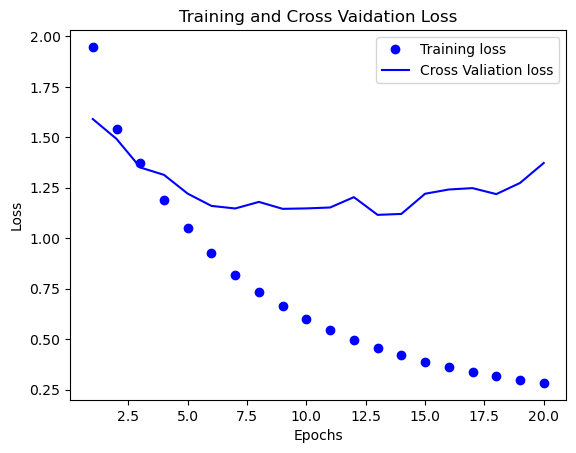

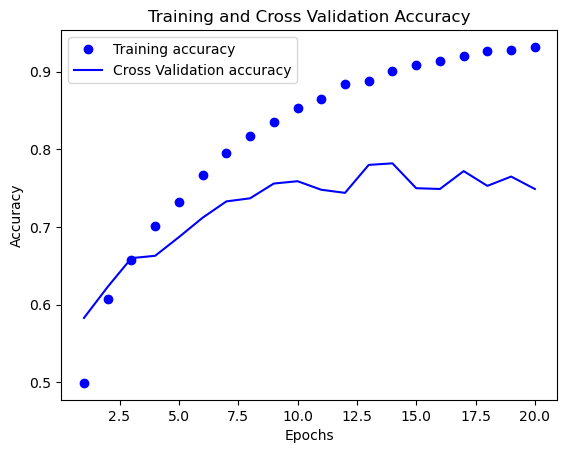

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt

epochs = range(1, len(History['loss']) + 1)

# Training and Cross Validation Loss
plt.plot(epochs, History['loss'], 'bo', label = 'Training loss')
plt.plot(epochs, History['val_loss'], 'b', label = 'Cross Valiation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Cross Vaidation Loss')
plt.legend()

plt.show()
plt.clf()


# Training and Cross Validation Accuracy
plt.plot(epochs, History['accuracy'], 'bo', label = 'Training accuracy')
plt.plot(epochs, History['val_accuracy'], 'b', label = 'Cross Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Cross Validation Accuracy')
plt.legend()

plt.show()
plt.clf()

<h3>Retraining the model</h3>

In [11]:
model = models.Sequential()
model.add(layers.Embedding(vocab_size, 100, input_length = maxlen))
model.add(layers.Bidirectional(layers.LSTM(32, recurrent_dropout = 0.2, dropout = 0.2)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(num_classes, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_partial_train, y_partial_train, epochs = 20, validation_data = (x_cval, y_cval))

Epoch 1/20
250/250 [==============================] - 109s 416ms/step - loss: 1.9700 - accuracy: 0.4886 - val_loss: 1.6071 - val_accuracy: 0.5940
Epoch 2/20
250/250 [==============================] - 103s 410ms/step - loss: 1.5552 - accuracy: 0.6035 - val_loss: 1.4887 - val_accuracy: 0.6220
Epoch 3/20
250/250 [==============================] - 102s 409ms/step - loss: 1.4212 - accuracy: 0.6344 - val_loss: 1.4289 - val_accuracy: 0.6300
Epoch 4/20
250/250 [==============================] - 101s 406ms/step - loss: 1.2791 - accuracy: 0.6760 - val_loss: 1.2739 - val_accuracy: 0.6870
Epoch 5/20
250/250 [==============================] - 100s 400ms/step - loss: 1.1082 - accuracy: 0.7194 - val_loss: 1.2028 - val_accuracy: 0.6950
Epoch 6/20
250/250 [==============================] - 103s 411ms/step - loss: 0.9877 - accuracy: 0.7537 - val_loss: 1.1275 - val_accuracy: 0.7130
Epoch 7/20
250/250 [==============================] - 101s 405ms/step - loss: 0.8819 - accuracy: 0.7820 - val_loss: 1.0722 -

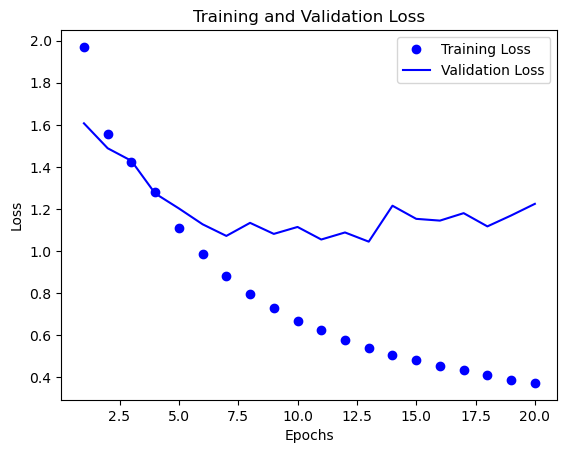

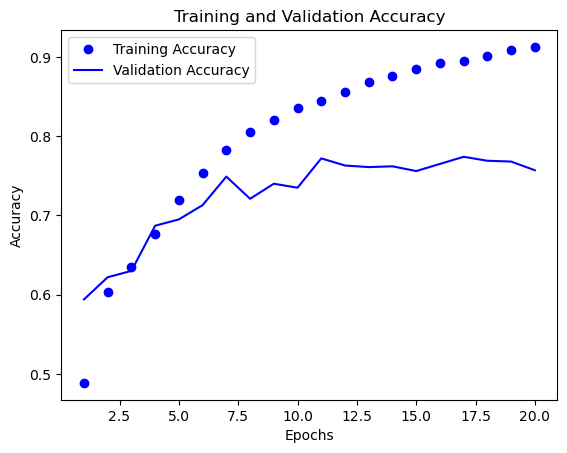

<Figure size 640x480 with 0 Axes>

In [12]:
# Plotting the loss and accuracy of training and validation data

epochs = range(1, len(history.history['loss']) + 1)

# Training and Validation Loss
plt.plot(epochs, history.history['loss'], 'bo', label = 'Training Loss')
plt.plot(epochs, history.history['val_loss'], 'b', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.figure()

# Training an Validation Accuracy
plt.plot(epochs, history.history['accuracy'], 'bo', label = 'Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'b', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()
plt.clf()

<h3>Evaluating on Test Data</h3>

In [13]:
test_results = model.evaluate(x_test, y_test)
test_results

71/71 [==============================] - 3s 44ms/step - loss: 1.4181 - accuracy: 0.7462


[1.4181395769119263, 0.7462155222892761]